In [34]:
import mysql.connector
import stuff
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [35]:
cnx = mysql.connector.connect(
    host = stuff.host,
    user = stuff.user,
    passwd = stuff.password)

In [36]:
cursor = cnx.cursor()

In [37]:
cnx.database = 'nyc_public_high_schools_grad_rate'

In [15]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Algebra'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)
df.rename(columns={"percent_scoring_65_or_above":"Common Core Algebra"}, inplace = True)
df

,school_name,school_name,regents_exam,percent_graduated,Common Core Algebra
0,Orchard Collegiate Academy,ORCHARD COLLEGIATE ACADEMY,Common Core Algebra,66.7,71.7
1,University Neighborhood High School,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Common Core Algebra,89.7,80.4
2,East Side Community School,EAST SIDE COMMUNITY SCHOOL,Common Core Algebra,89.9,83.3
3,Forsyth Satellite Academy,FORSYTH SATELLITE ACADEMY,Common Core Algebra,14.9,0.0
4,Marta Valle High School,MARTA VALLE HIGH SCHOOL,Common Core Algebra,66.1,39.5
5,Lower East Side Preparatory High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,Common Core Algebra,35.8,82.6
6,Cascades High School,CASCADES HIGH SCHOOL,Common Core Algebra,23.6,60.0
7,Bard High School Early College,BARD HIGH SCHOOL EARLY COLLEGE,Common Core Algebra,94.7,94.3
8,47 The American Sign Language and English Seco...,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,Common Core Algebra,91.4,77.3
9,The Urban Assembly School for Emergency Manage...,THE URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGE...,Common Core Algebra,67.0,70.1


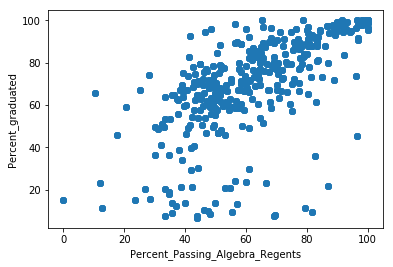

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:19:53   Log-Likelihood:                -6116.4
No. Observations:                1428   AIC:                         1.223e+04
Df Residuals:                    1427   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8564      0.006    133.932    

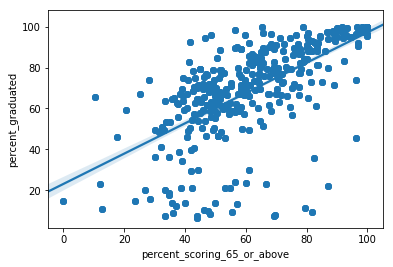

In [41]:

cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Algebra'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Algebra_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))
sns.regplot(x='percent_scoring_65_or_above', y = 'percent_graduated', data =df )


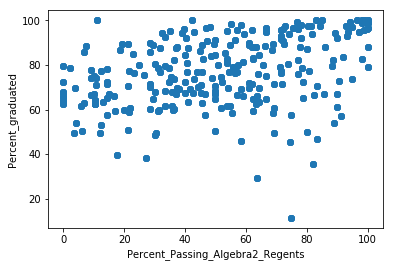

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     4312.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:30:03   Log-Likelihood:                -4892.1
No. Observations:                1048   AIC:                             9786.
Df Residuals:                    1047   BIC:                             9791.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6689      0.010     65.668    

In [22]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Algebra2'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Algebra2_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

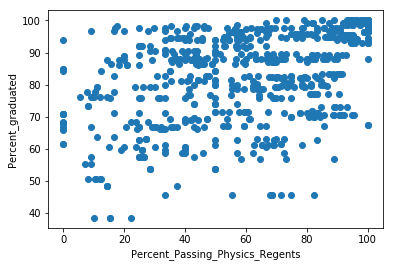

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     4631.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          2.74e-318
Time:                        15:25:30   Log-Likelihood:                -3385.2
No. Observations:                 731   AIC:                             6772.
Df Residuals:                     730   BIC:                             6777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7434      0.011     68.052    

In [11]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Physical Settings/Physics'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Physics_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

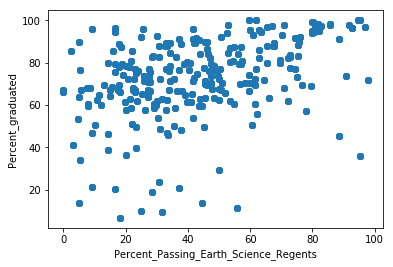

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     4442.
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:37:27   Log-Likelihood:                -4737.6
No. Observations:                1056   AIC:                             9477.
Df Residuals:                    1055   BIC:                             9482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5886      0.009     66.645    

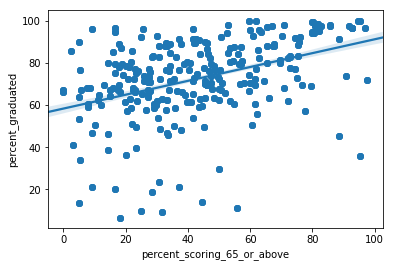

In [43]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Physical Settings/Earth Science'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Earth_Science_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))
sns.regplot(x='percent_scoring_65_or_above', y = 'percent_graduated', data =df )

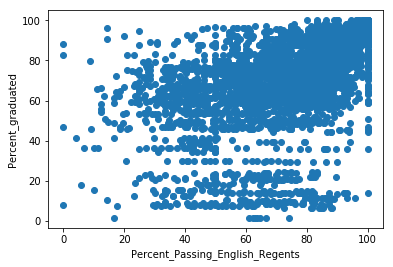

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 4.232e+04
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:28:45   Log-Likelihood:                -16848.
No. Observations:                3741   AIC:                         3.370e+04
Df Residuals:                    3740   BIC:                         3.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0032      0.005    205.726    

In [14]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core English'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_English_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

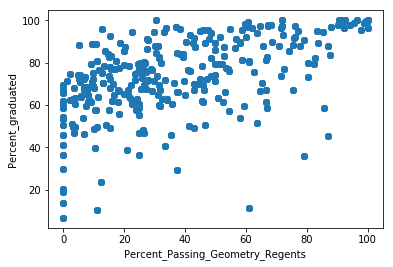

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3378.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:30:28   Log-Likelihood:                -5580.2
No. Observations:                1216   AIC:                         1.116e+04
Df Residuals:                    1215   BIC:                         1.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5251      0.009     58.120    

In [24]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Geometry'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Geometry_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

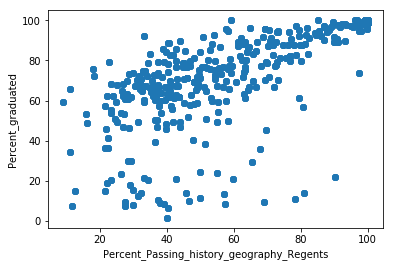

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.181e+04
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:31:00   Log-Likelihood:                -6044.1
No. Observations:                1384   AIC:                         1.209e+04
Df Residuals:                    1383   BIC:                         1.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7662      0.007    108.655    

In [25]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Global History and Geography'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_history_geography_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

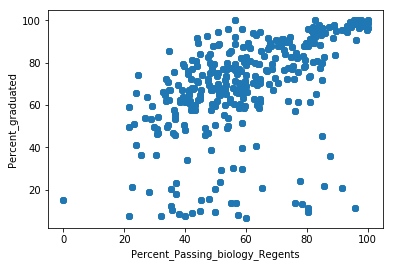

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.271e+04
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:31:05   Log-Likelihood:                -6036.6
No. Observations:                1372   AIC:                         1.208e+04
Df Residuals:                    1371   BIC:                         1.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8253      0.007    112.758    

In [26]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Living Environment'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_biology_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

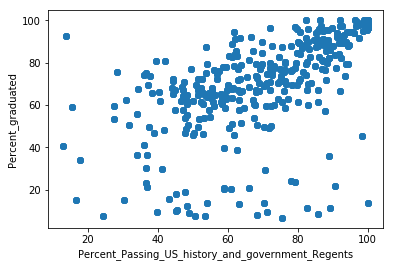

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.583e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:15:40   Log-Likelihood:                -6137.6
No. Observations:                1384   AIC:                         1.228e+04
Df Residuals:                    1383   BIC:                         1.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9469      0.008    125.835    

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


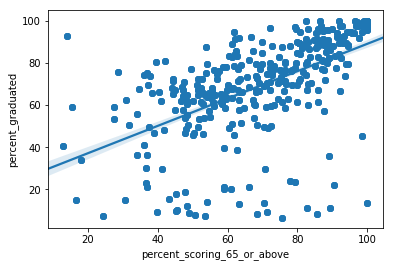

In [40]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'U.S. History and Government'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_US_history_and_government_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))
sns.regplot(x='percent_scoring_65_or_above', y = 'percent_graduated', data =df )

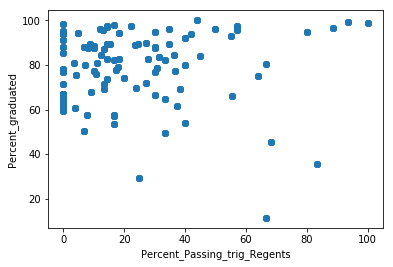

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     406.4
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           5.32e-63
Time:                        13:32:01   Log-Likelihood:                -1849.6
No. Observations:                 404   AIC:                             3701.
Df Residuals:                     403   BIC:                             3705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2941      0.015     20.158    

In [28]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Algebra2/Trigonometry'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_trig_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

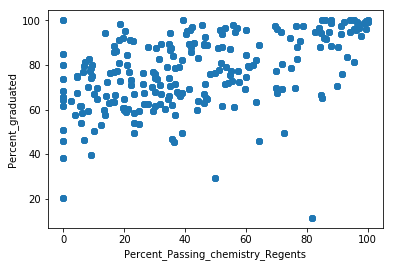

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2855.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          1.24e-288
Time:                        13:32:32   Log-Likelihood:                -4451.9
No. Observations:                 952   AIC:                             8906.
Df Residuals:                     951   BIC:                             8911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5748      0.011     53.431    

In [29]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Physical Settings/Chemistry'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_chemistry_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

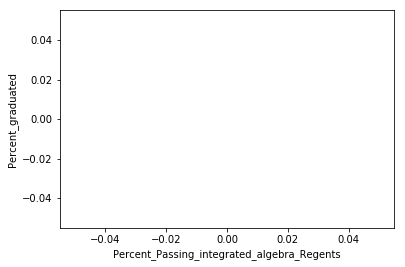

None


ValueError: zero-size array to reduction operation maximum which has no identity

In [30]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Integrated Algebra'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_integrated_algebra_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

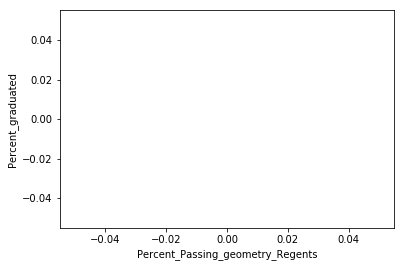

None


ValueError: zero-size array to reduction operation maximum which has no identity

In [31]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.regents.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Geometry'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_geometry_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated'])))

# Getting 80 or above

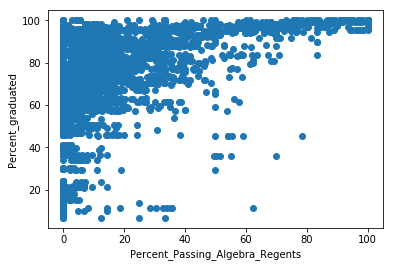

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2973.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:05:36   Log-Likelihood:                -15614.
No. Observations:                3531   AIC:                         3.123e+04
Df Residuals:                    3530   BIC:                         3.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2503      0.005     54.526    

In [28]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Algebra'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Algebra_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

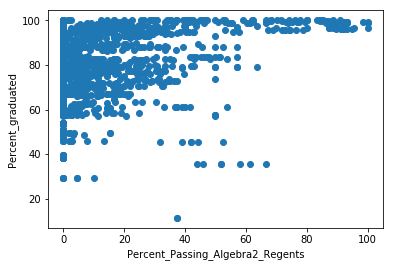

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     926.3
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.68e-163
Time:                        16:10:35   Log-Likelihood:                -7696.3
No. Observations:                1742   AIC:                         1.539e+04
Df Residuals:                    1741   BIC:                         1.540e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1813      0.006     30.436    

In [29]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Algebra2'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Algebra2_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

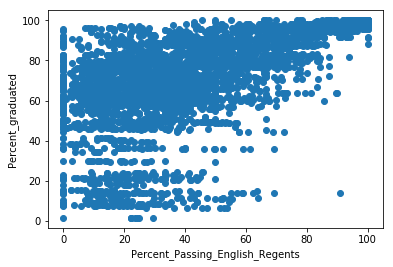

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:11:18   Log-Likelihood:                -16796.
No. Observations:                3741   AIC:                         3.359e+04
Df Residuals:                    3740   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5935      0.005    123.417    

In [30]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core English'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_English_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

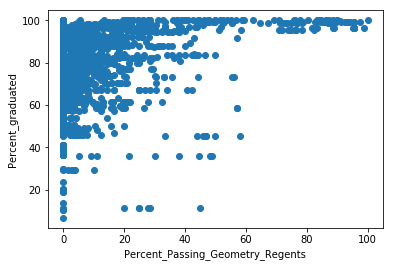

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     898.8
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.56e-168
Time:                        16:12:52   Log-Likelihood:                -10435.
No. Observations:                2455   AIC:                         2.087e+04
Df Residuals:                    2454   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1318      0.004     29.980    

In [32]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Geometry'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Geometry_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

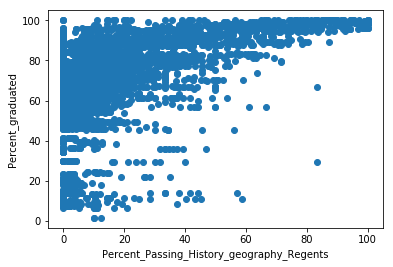

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     4339.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:13:44   Log-Likelihood:                -15158.
No. Observations:                3394   AIC:                         3.032e+04
Df Residuals:                    3393   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3237      0.005     65.871    

In [33]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Global History and Geography'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_History_geography_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

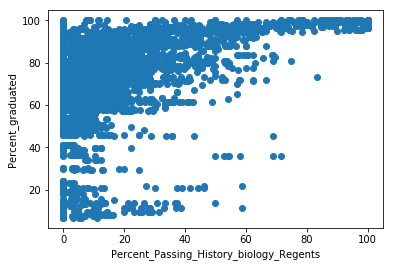

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     3902.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:14:14   Log-Likelihood:                -14990.
No. Observations:                3378   AIC:                         2.998e+04
Df Residuals:                    3377   BIC:                         2.999e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2983      0.005     62.467    

In [34]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Living Environment'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_History_biology_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

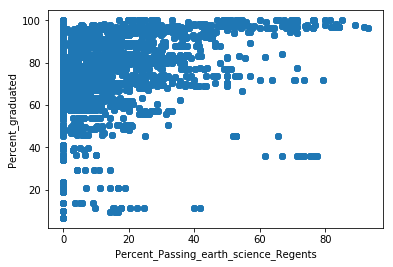

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     7985.
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:37:08   Log-Likelihood:                -37444.
No. Observations:                8932   AIC:                         7.489e+04
Df Residuals:                    8931   BIC:                         7.490e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1997      0.002     89.360    

KeyError: 'percent_scoring_65_or_above'

In [42]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Physical Settings/Earth Science'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_earth_science_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))
sns.regplot(x='percent_scoring_65_or_above', y = 'percent_graduated', data =df )

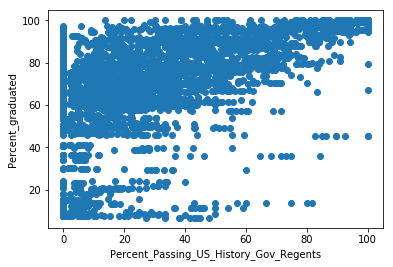

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     8643.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:16:07   Log-Likelihood:                -14857.
No. Observations:                3270   AIC:                         2.972e+04
Df Residuals:                    3269   BIC:                         2.972e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5017      0.005     92.969    

In [36]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'U.S. History and Government'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_US_History_Gov_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

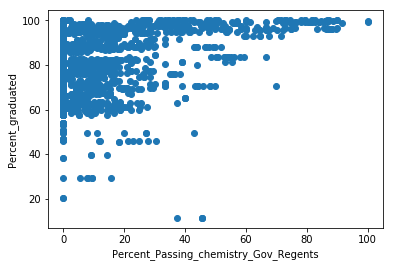

None
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1080.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.30e-179
Time:                        16:17:27   Log-Likelihood:                -6753.5
No. Observations:                1531   AIC:                         1.351e+04
Df Residuals:                    1530   BIC:                         1.351e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2059      0.006     32.857    

In [37]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Physical Settings/Chemistry'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_chemistry_Gov_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

In [3]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_80_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Physical Settings/Physics'
;
""")

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df.dropna(inplace = True)

plt.scatter(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_physics_Gov_Regents')
plt.ylabel('Percent_graduated')
print(plt.show())
x=sm.OLS(list(df['percent_scoring_80_or_above']),list(df['percent_graduated']))
results = x.fit()
print(results.summary())
print(stats.pearsonr(list(df['percent_scoring_80_or_above']),list(df['percent_graduated'])))

NameError: name 'cursor' is not defined

In [1]:
import seaborn as sns

In [2]:
sns.heatmap(df.corr())

NameError: name 'df' is not defined